# Fits 文件操作入门
2019-10-24  by Yu Heng @ BNU

In [1]:
%matplotlib inline
from astropy.io import fits
hdu_t = fits.open('gal_info_dr7_v5_2.fit')
hdu_t.info()

Filename: gal_info_dr7_v5_2.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     67   927552R x 25C   [I, J, I, 5I, E, E, 5E, I, I, 19A, 6A, 21A, E, E, I, E, E, E, E, E, E, 3E, 3E, 5E, 12A]   


In [2]:
hdu_i = fits.open('frame-g-003712-3-0187.fits')
hdu_i.info()

Filename: frame-g-003712-3-0187.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [3]:
print(hdu_t[0].header) 
print(hdu_t['primary'].header)

SIMPLE  =                    T /Dummy Created by MWRFITS v1.6a                  BITPIX  =                    8 /Dummy primary header created by MWRFITS         NAXIS   =                    0 /No data is associated with this header          EXTEND  =                    T /Extensions may (will!) be present               END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [4]:
print(repr(hdu_t[0].header))
print(list(hdu_t[0].header.keys()))

SIMPLE  =                    T /Dummy Created by MWRFITS v1.6a                  
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               
['SIMPLE', 'BITPIX', 'NAXIS', 'EXTEND']


In [5]:
print(repr(hdu_t[1].header[:5]))
print(len(hdu_t[1].data))
print(hdu_t[1].data.names)
ra = hdu_t[1].data['ra']
dec = hdu_t[1].data.field(5)
z = hdu_t[1].data['z']

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.6a           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  186 /Number of bytes per row                         
NAXIS2  =               927552 /Number of rows                                  
927552
['PLATEID', 'MJD', 'FIBERID', 'PHOTOID', 'RA', 'DEC', 'PLUG_MAG', 'PRIMTARGET', 'SECTARGET', 'TARGETTYPE', 'SPECTROTYPE', 'SUBCLASS', 'Z', 'Z_ERR', 'Z_WARNING', 'V_DISP', 'V_DISP_ERR', 'SN_MEDIAN', 'E_BV_SFD', 'ZTWEAK', 'ZTWEAK_ERR', 'SPECTRO_MAG', 'KCOR_MAG', 'KCOR_MODEL_MAG', 'RELEASE']


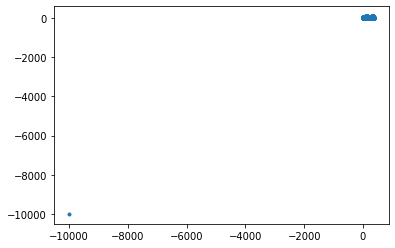

In [6]:
import pylab as plt
plt.figure()
plt.plot(ra,dec,'.')
plt.show()

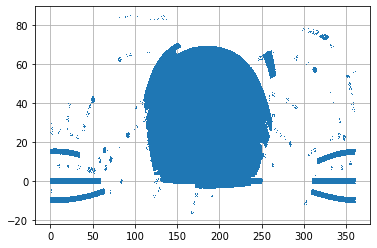

In [7]:
plt.plot(ra[ra>-360],dec[ra>-360],',')
plt.grid("on")

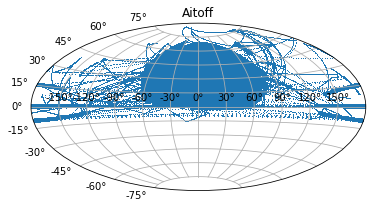

In [8]:
import numpy as np
# there are bugs in matplotlib 3.1, fine with 2.1.1
plt.figure()
ax = plt.subplot(projection="aitoff")
plt.plot(np.radians(ra[::4]-180), np.radians(dec[::4]), ',',zorder=0)
plt.grid(True)
plt.title("Aitoff")
plt.show()

6217


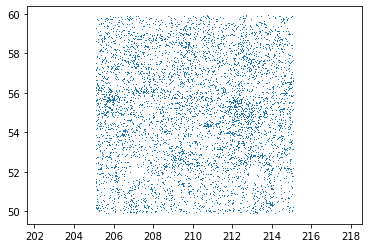

In [9]:
rad = 5
centroid = [210.08759 , 54.876254]
ind = (np.abs(ra -centroid[0])< rad ) * (np.abs(dec -centroid[1])< rad)
print(np.sum(ind))
field = np.r_[ra[ind],dec[ind],z[ind]]

plt.figure()
plt.plot(ra[ind],dec[ind],',')
plt.axis("equal")
plt.show()

8838


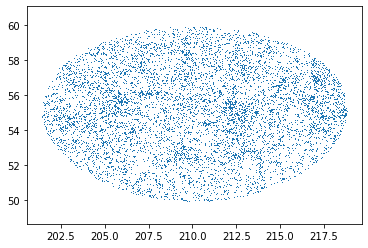

In [10]:
from astropy import units as u
from astropy.coordinates import SkyCoord 

ra_n = ra[ra!=-9999]
dec_n = dec[ra!=-9999]
z_n = z[ra!=-9999]

c1 = SkyCoord(ra_n, dec_n,unit="deg") 
c2 = SkyCoord(ra=centroid[0]*u.degree, dec=centroid[1]*u.degree) 
ind = c1.separation(c2).degree<rad
print(np.sum(ind))

plt.figure()
plt.plot(ra_n[ind],dec_n[ind],',')
plt.axis("equal")
plt.show()

/home/gerry/prog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


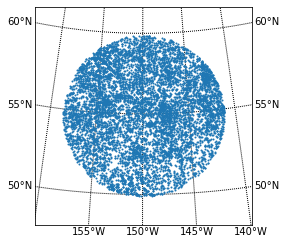

In [12]:
import os 
# os.environ['PROJ_LIB'] = 'C:\\Users\\gerry\\Anaconda3\\Library\\share'  # for windows
os.environ['PROJ_LIB'] = '/home/gerry/prog/anaconda3/share/proj'    # for linux
from mpl_toolkits.basemap import Basemap
lon_0 = centroid[0]; lat_0 = centroid[1]; width = 1500000    #  in meters
m = Basemap(width=width, height=width, projection='aeqd',lat_0=lat_0,lon_0=lon_0)
m.drawparallels(np.arange(40,70,5),labels=[1,1,0,0])  # left, right
m.drawmeridians(np.arange(200,230,5),labels=[0,0,0,1])  # up, bottom
xpt, ypt = m(ra_n[ind], dec_n[ind])
m.plot(xpt,ypt, '.', ms=2)

In [13]:
# Write FITS table
cols_ = []
cols_.append(fits.Column(name='RA', format='E', array=ra_n[ind]))
cols_.append(fits.Column(name='DEC', format='E', array=dec_n[ind]))
cols_.append(fits.Column(name='z', format='E', array=z_n[ind]))
cols = fits.ColDefs(cols_)

hdu = fits.BinTableHDU.from_columns(cols)
hdr = fits.Header()
hdr['OBSERVER'] = 'SDSS'
hdr['COMMENT'] = "SDSS galaxy around M101."
primary_hdu = fits.PrimaryHDU(header=hdr)

hdul = fits.HDUList([primary_hdu, hdu])
hdul.writeto('table_m101_r5.fits',overwrite=True)

(719, 1000)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


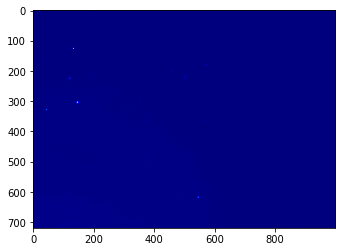

In [14]:
from astropy.nddata import Cutout2D
from astropy import wcs

n_cent = [210.7194019, 54.4090593]
imfile = "frame-i-003712-3-0187"
hdu_f = fits.open(imfile+".fits")
im = hdu_f[0].data
w = wcs.WCS(hdu_f[0].header)
# example coordinate - you'll have to figure one out that's in your map
center = SkyCoord(n_cent[0]*u.deg, n_cent[1]*u.deg, frame='fk5')

# then make an array cutout
co = Cutout2D(im, center, size=1000, wcs=w)
print(co.data.shape)
plt.imshow(co.data,cmap="jet")
plt.show()
# create a new FITS HDU
hdu = fits.PrimaryHDU(data=co.data, header=co.wcs.to_header())

# write to disk
hdu.writeto(imfile+'_crop.fits',overwrite=True)

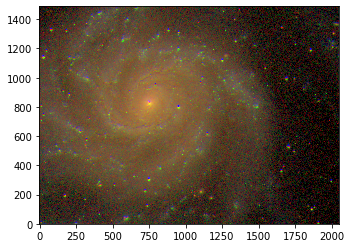

In [15]:
from astropy.visualization import make_lupton_rgb
im_r = fits.open('frame-i-003712-3-0187.fits')
im_g = fits.open('frame-r-003712-3-0187.fits')
im_b = fits.open('frame-g-003712-3-0187.fits')

rgb_default = make_lupton_rgb(im_r[0].data, im_g[0].data, im_b[0].data, Q=10, stretch=0.3, filename="sdss_rgb.png")
plt.imshow(rgb_default, origin='lower')
plt.show()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -3.213e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.683e+00 [aplpy.core]


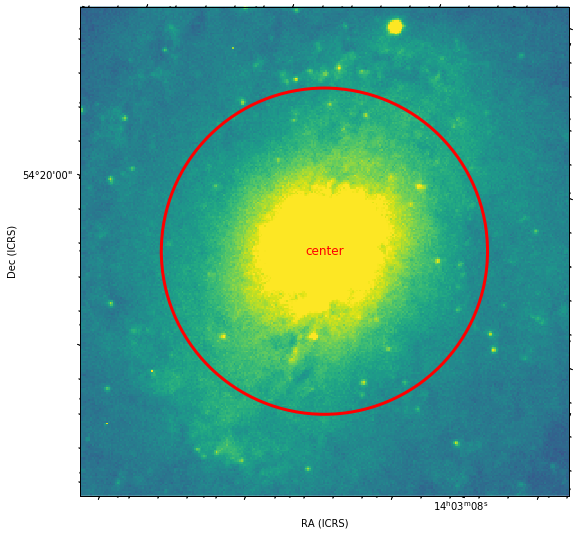

In [18]:
import aplpy
import pylab as plt
fig = aplpy.FITSFigure('frame-i-003712-3-0187.fits')
fig.recenter(210.802, 54.349, width=0.03, height=0.03) 
fig.add_label(210.802, 54.349, 'center',color='r',size=12)
fig.show_circles(210.802, 54.349,0.01,color='r',lw=3)
fig.show_colorscale()
plt.show()

In [54]:
fig = aplpy.FITSFigure('frame-i-003712-3-0187.fits')
fig.show_colorscale(cmap="gray_r",vmid=1e-3,vmin=1e-1, stretch="log")
fig.add_colorbar()

fig.show_contour('M101_NVSS.fits', levels=8, cmap="hot")
#fig.show_regions('m101.reg')

hdu_t = fits.open('table_m101_r5.fits')
ra = hdu_t[1].data['ra']
dec = hdu_t[1].data.field('dec')
fig.show_markers(ra, dec, layer='marker_set_1', edgecolor='b',
                facecolor='none', marker='o', s=100, alpha=0.8)

plt.show()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:287: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:287: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


INFO: Auto-setting vmax to  2.109e+00 [aplpy.core]


/home/gerry/prog/anaconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:287: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:287: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:287: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/home/gerry/prog/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/gerry/prog/anaconda3/lib/python3.7